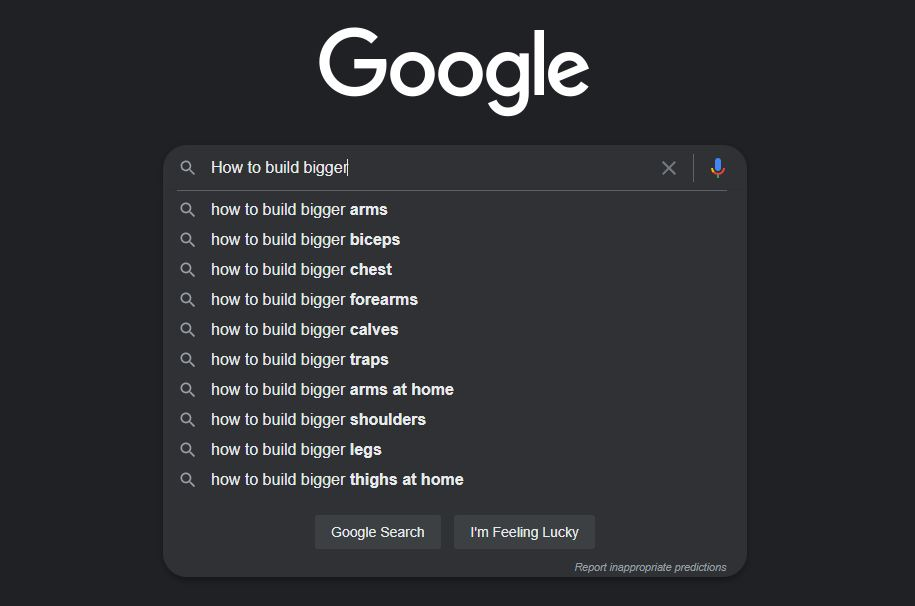

In [294]:
from IPython.display import Image
Image(filename ='/content/Next_word.JPG', width = 1000, height = 600)

# Problem Statement 

    Next Word Prediction or what is also called Language Modeling is the task of predicting what word comes next. It is one of the fundamental tasks of NLP and has many applications. You might be using it daily when you write texts or emails without realizing it.

    You need to create a language model using the Data that can suggest 3 Most probabilistic Next words to a given word or an incomplete sentence.

# Load the Dataset

In [1]:
file_path = '/content/1661-0.txt'
def read_file(filepath):
  with open(filepath) as f:
    str_text = f.read()
  return str_text
print(read_file(file_path))

﻿
Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***



Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue 

In [2]:
# Checking the length of the whole Dataset
len(read_file('/content/1661-0.txt'))

581888

In [3]:
# Printing the first 5000 words
print(read_file('/content/1661-0.txt')[:5000])

﻿
Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***



Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue 

# Data Preprocessing

    In here we are importing the spacy library which we will use for data preprocessing.

In [4]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()
nlp.max_length = 581889

In [5]:
def read_file(filepath):
    
    with open(filepath) as f:
        str_text = f.read()
    
    return str_text[:250000]

    In the below function we had change the all uppercase in text to lower and removing all the puntuations from the text

In [6]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n \n\n\n\n!"-#$%&()--.*"+,-/:;<=>?@[\\]^_`{|}~\t\n \n\n\n  \n     \ufeff']

In [7]:
# Applying seperate_punc on text and getting the tokens
d = read_file('/content/1661-0.txt')
tokens = separate_punc(d)

In [8]:
tokens

['project',
 'gutenberg',
 "'s",
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www.gutenberg.net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf-8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'anonymous',
 '

In [9]:
# Checking the types of tokens
type(tokens)

list

In [10]:
len(tokens)

49623

In [11]:
tokens[:10]

['project',
 'gutenberg',
 "'s",
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur']

# Initializing the training length and creating the text sequences on top of which will do the training and testing.

In [198]:
# organize into sequences of tokens
train_len = 25+1 # 25 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)

In [199]:
print(read_file('/content/1661-0.txt')[:1000])

﻿
Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***



Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue 

# Below checking first three text sequences.

In [200]:
' '.join(text_sequences[0])

"project gutenberg 's the adventures of sherlock holmes by arthur conan doyle this ebook is for the use of anyone anywhere at no cost and with"

In [201]:
' '.join(text_sequences[1])

"gutenberg 's the adventures of sherlock holmes by arthur conan doyle this ebook is for the use of anyone anywhere at no cost and with almost"

In [202]:
' '.join(text_sequences[2])

"'s the adventures of sherlock holmes by arthur conan doyle this ebook is for the use of anyone anywhere at no cost and with almost no"

In [203]:
len(text_sequences) #Every sentence is containing 26 words

49597

In [204]:
len(tokens) # These are total number of words in the whole novel

49623

In [205]:
print(len(text_sequences[0]))
print(text_sequences[0])

26
['project', 'gutenberg', "'s", 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with']


# Tokenize the sentences by using tokenizer from keras.preprocessing

    This class allows you to vectorize a text corpus by converting each text into either a series of integers (each integer being the index of a token in a dictionary) or a vector with a binary coefficient for each token (based on tf-idf).

In [206]:
from keras.preprocessing.text import Tokenizer

In [207]:
# Integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [208]:
print(len(sequences[0]))
print(sequences[0])

26
[1347, 1345, 5396, 1, 783, 3, 110, 31, 46, 1795, 1794, 1793, 36, 1344, 16, 24, 1, 266, 3, 685, 2653, 23, 47, 1792, 2, 19]


In [209]:
type(tokenizer.index_word)

dict

In [210]:
' '.join(text_sequences[0])

"project gutenberg 's the adventures of sherlock holmes by arthur conan doyle this ebook is for the use of anyone anywhere at no cost and with"

# Below we are checking all the tokenized words for the first 20 index

In [211]:
i=0
for a in tokenizer.index_word:
    print(a,"--->",tokenizer.index_word[a])
    i+=1
    if i==20 : break 

1 ---> the
2 ---> and
3 ---> of
4 ---> to
5 ---> i
6 ---> “
7 ---> a
8 ---> ”
9 ---> in
10 ---> it
11 ---> that
12 ---> he
13 ---> was
14 ---> you
15 ---> his
16 ---> is
17 ---> as
18 ---> have
19 ---> with
20 ---> my


# Below we are checking tokenized words and the indexes from the first sequence

In [212]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

1347 : project
1345 : gutenberg
5396 : 's
1 : the
783 : adventures
3 : of
110 : sherlock
31 : holmes
46 : by
1795 : arthur
1794 : conan
1793 : doyle
36 : this
1344 : ebook
16 : is
24 : for
1 : the
266 : use
3 : of
685 : anyone
2653 : anywhere
23 : at
47 : no
1792 : cost
2 : and
19 : with


# Word counts for the first 10 words from the text

In [213]:
i=0
for a in tokenizer.word_counts:
    print((a,tokenizer.word_counts[a]))
    i+=1
    if i==10 : break 

('project', 79)
('gutenberg', 80)
("'s", 3)
('the', 66139)
('adventures', 161)
('of', 32403)
('sherlock', 1411)
('holmes', 5910)
('by', 4195)
('arthur', 62)


In [241]:
# In here we are building the vocabulary size to train the model
vocabulary_size = len(tokenizer.word_index)+1
vocabulary_size

5397

In [243]:
# Checking the last 10 tokens from the vocabulary size 
i=5386
for a in range(i,5397):
    print(a,"--->",tokenizer.index_word[a])
    #i+=1
    #if i==6999 : break 

5386 ---> stuffed
5387 ---> pennies—421
5388 ---> 270
5389 ---> swept
5390 ---> eddy
5391 ---> weighted
5392 ---> stripped
5393 ---> sucked
5394 ---> speciously
5395 ---> seize
5396 ---> 's


In [244]:
import numpy as np

In [247]:
len(sequences)

49597

In [248]:
len(sequences[0])

26

In [249]:
# Converting the sequences into an array
sequences = np.array(sequences)

In [250]:
sequences.shape

(49597, 26)

In [251]:
sequences

array([[1347, 1345, 5396, ..., 1792,    2,   19],
       [1345, 5396,    1, ...,    2,   19,  471],
       [5396,    1,  783, ...,   19,  471,   47],
       ...,
       [  87,  206, 1785, ...,   59,   10,   51],
       [ 206, 1785,    3, ...,   10,   51, 1346],
       [1785,    3,    1, ...,   51, 1346,    4]])

# Building the LSTM Embedding Sequential Model.

In [252]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [253]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 25, input_length=seq_len))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(150))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(vocabulary_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

# Splitting the sequence data into X and y and transforming into categorical form

In [254]:
from tensorflow.keras.utils import to_categorical

In [255]:
print(sequences.shape)
sequences

(49597, 26)


array([[1347, 1345, 5396, ..., 1792,    2,   19],
       [1345, 5396,    1, ...,    2,   19,  471],
       [5396,    1,  783, ...,   19,  471,   47],
       ...,
       [  87,  206, 1785, ...,   59,   10,   51],
       [ 206, 1785,    3, ...,   10,   51, 1346],
       [1785,    3,    1, ...,   51, 1346,    4]])

In [256]:
print(sequences[:,:-1].shape)
sequences[:,:-1]

(49597, 25)


array([[1347, 1345, 5396, ...,   47, 1792,    2],
       [1345, 5396,    1, ..., 1792,    2,   19],
       [5396,    1,  783, ...,    2,   19,  471],
       ...,
       [  87,  206, 1785, ...,   60,   59,   10],
       [ 206, 1785,    3, ...,   59,   10,   51],
       [1785,    3,    1, ...,   10,   51, 1346]])

In [257]:
print(sequences[:,-1].shape)
sequences[:,-1]

(49597,)


array([  19,  471,   47, ...,   51, 1346,    4])

In [258]:
X = sequences[:,:-1]

In [260]:
X.shape

(49597, 25)

In [261]:
y = sequences[:,-1]

In [262]:
y.shape

(49597,)

In [263]:
y = to_categorical(y, num_classes=vocabulary_size)

In [264]:
y.shape

(49597, 5397)

In [265]:
seq_len = X.shape[1]

In [266]:
seq_len

25

# Below is the Summary of our LSTM Architecture

* Here model is sequential.
* Then an embedding layer with vocabulary size of 5397, batch size of 25 and sequence length of 25.
* In second layer of LSTM added a batch size of 150 and returning the sequence of 25.
* Again in third layer put a batch size of 150 of LSTM.
* Then added a dense layer of batch size of 150 with an activation function of rectified linear unit.
* At last in the output added a dense layer of vocabulary size and activation of softmax.
* Then compile the model with loss='categorical_crossentropy', optimizer='adam' and metrics=['accuracy'].

In [267]:
model = create_model(vocabulary_size, seq_len)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 25, 25)            134925    
                                                                 
 lstm_22 (LSTM)              (None, 25, 150)           105600    
                                                                 
 lstm_23 (LSTM)              (None, 150)               180600    
                                                                 
 dense_21 (Dense)            (None, 150)               22650     
                                                                 
 dense_22 (Dense)            (None, 5397)              814947    
                                                                 
Total params: 1,258,722
Trainable params: 1,258,722
Non-trainable params: 0
_________________________________________________________________


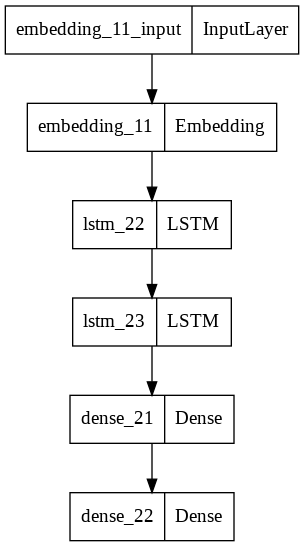

In [268]:
# Below is the Architecture of our LSTM model
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='/content/model.png', show_layer_names=True)

# Training the model.
    As it took 5 to 6 hours to train the model and don't have any good powerful GPU so train the model only on 100 epochs and batch size of 128.

In [269]:
model.fit(X, y, batch_size=128, epochs=100,verbose=1,validation_batch_size=.20)

Epoch 1/100
388/388 [==============================] - 97s 242ms/step - loss: 6.5233 - accuracy: 0.0498
Epoch 2/100
388/388 [==============================] - 95s 244ms/step - loss: 6.0535 - accuracy: 0.0679
Epoch 3/100
388/388 [==============================] - 93s 239ms/step - loss: 5.7999 - accuracy: 0.0853
Epoch 4/100
388/388 [==============================] - 93s 240ms/step - loss: 5.6530 - accuracy: 0.0927
Epoch 5/100
388/388 [==============================] - 94s 242ms/step - loss: 5.5427 - accuracy: 0.0999
Epoch 6/100
388/388 [==============================] - 94s 243ms/step - loss: 5.4459 - accuracy: 0.1049
Epoch 7/100
388/388 [==============================] - 95s 244ms/step - loss: 5.3452 - accuracy: 0.1133
Epoch 8/100
388/388 [==============================] - 94s 243ms/step - loss: 5.2474 - accuracy: 0.1199
Epoch 9/100
388/388 [==============================] - 94s 243ms/step - loss: 5.1565 - accuracy: 0.1248
Epoch 10/100
388/388 [==============================] - 95s 245m

# Saving the whole model into pickle file to use it later

In [270]:
from pickle import dump,load

In [272]:
# save the model to file
model.save('/content/epochBIG.h5')
# save the tokenizer
dump(tokenizer, open('/content/epochBIG', 'wb'))

In [273]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

# Predicting the next three words

In [274]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate (25 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict Class Probabilities for each word
        #pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        predict_x=model.predict(pad_encoded) 
        pred_word_ind=np.argmax(predict_x,axis=1)[0]
        #print(pred_word_ind)
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    return ' '.join(output_text)

In [275]:
print(text_sequences[0])

['project', 'gutenberg', "'s", 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with']


In [276]:
import random
random_pick = random.randint(0,len(text_sequences))

In [277]:
random_seed_text = text_sequences[random_pick]

In [278]:
print(random_seed_text)

['world', 'has', 'seen', 'but', 'as', 'a', 'lover', 'he', 'would', 'have', 'placed', 'himself', 'in', 'a', 'false', 'position', 'he', 'never', 'spoke', 'of', 'the', 'softer', 'passions', 'save', 'with', 'a']


In [279]:
seed_text = ' '.join(random_seed_text)
seed_text

'world has seen but as a lover he would have placed himself in a false position he never spoke of the softer passions save with a'

In [280]:
model = load_model('/content/epochBIG.h5')

In [281]:
tokenizer = load(open('/content/epochBIG', 'rb'))

In [282]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=3)

'gibe and a'

In [283]:
text=' It is a way I have of driving off the spleen and regulating the circulation.  Whenever I find'
print(text)

 It is a way I have of driving off the spleen and regulating the circulation.  Whenever I find


In [284]:
generate_text(model,tokenizer,seq_len,seed_text=text,num_gen_words=3)

'it i found'

In [285]:
print(read_file('/content/1661-0.txt')[250000:251000])

In [286]:
test_text='Three better,more likely sea-officers and men, each in his own different way,could not readily be found, and they were every'
print(test_text)

Three better,more likely sea-officers and men, each in his own different way,could not readily be found, and they were every


In [287]:
generate_text(model,tokenizer,seq_len,seed_text=test_text,num_gen_words=1)

'minds'

In [290]:
seed_text = "How to grow bigger"

In [291]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=3)

'the boscombe pool'

# Techniques to Learn
## Forward and backward Propagation in a Nueral Network

Weights and bias: The weights and bias that will be used for both layers must be stated at the start, and among them, the weights will be declared randomly to avoid all units producing the same result, while the bias will be set to zero. The computation will be done from scratch using the principles listed below, with W1, W2 and b1 and b2 representing the weights and bias of the first and second layers, respectively. The letter A denotes the activation of a certain layer.
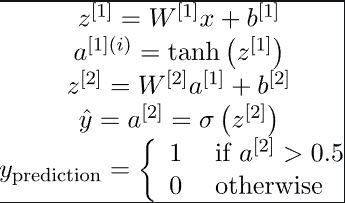

The aforementioned model's cost function will correspond to the cost function utilised with logistic regression.
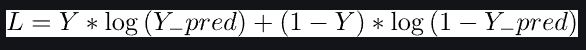

### Initializing the Weight and Bias matrix.

    Because there are four hidden units, the W1 weight matrix will be of shape (4, number of features) and the bias matrix will be of shape (4, 1), which will add up to the weight matrix after broadcasting according to the formula above. The same may be said about the W2.

In [313]:
# Import packages
import os as os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_context("notebook")
plt.style.use("fivethirtyeight")

In [314]:
# Initialize parameters
def initialize_parameters(layers_dims):
    """
    Initialize parameters dictionary.
    
    Weight matrices will be initialized to random values from uniform normal
    distribution.
    bias vectors will be initialized to zeros.

    Arguments
    ---------
    layers_dims : list or array-like
        dimensions of each layer in the network.

    Returns
    -------
    parameters : dict
        weight matrix and the bias vector for each layer.
    """
    np.random.seed(1)               
    parameters = {}
    L = len(layers_dims)            

    for l in range(1, L):           
        parameters["W" + str(l)] = np.random.randn(
            layers_dims[l], layers_dims[l - 1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))

        assert parameters["W" + str(l)].shape == (
            layers_dims[l], layers_dims[l - 1])
        assert parameters["b" + str(l)].shape == (layers_dims[l], 1)

    return parameters

In [315]:
# Define activation functions that will be used in forward propagation
def sigmoid(Z):
    """
    Computes the sigmoid of Z element-wise.

    Arguments
    ---------
    Z : array
        output of affine transformation.

    Returns
    -------
    A : array
        post activation output.
    Z : array
        output of affine transformation.
    """
    A = 1 / (1 + np.exp(-Z))

    return A, Z


def tanh(Z):
    """
    Computes the Hyperbolic Tagent of Z elemnet-wise.

    Arguments
    ---------
    Z : array
        output of affine transformation.

    Returns
    -------
    A : array
        post activation output.
    Z : array
        output of affine transformation.
    """
    A = np.tanh(Z)

    return A, Z


def relu(Z):
    """
    Computes the Rectified Linear Unit (ReLU) element-wise.

    Arguments
    ---------
    Z : array
        output of affine transformation.

    Returns
    -------
    A : array
        post activation output.
    Z : array
        output of affine transformation.
    """
    A = np.maximum(0, Z)

    return A, Z


def leaky_relu(Z):
    """
    Computes Leaky Rectified Linear Unit element-wise.

    Arguments
    ---------
    Z : array
        output of affine transformation.

    Returns
    -------
    A : array
        post activation output.
    Z : array
        output of affine transformation.
    """
    A = np.maximum(0.1 * Z, Z)

    return A, Z

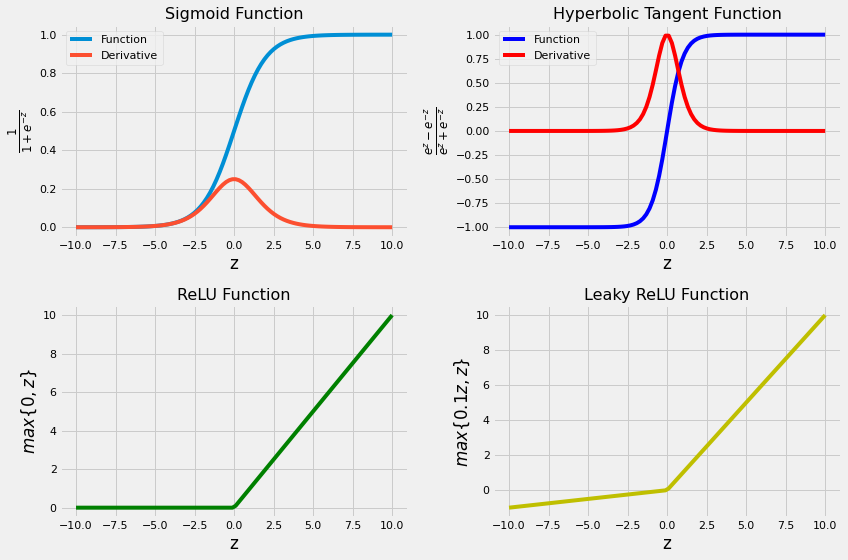

In [316]:
# Plot the 4 activation functions
z = np.linspace(-10, 10, 100)

# Computes post-activation outputs
A_sigmoid, z = sigmoid(z)
A_tanh, z = tanh(z)
A_relu, z = relu(z)
A_leaky_relu, z = leaky_relu(z)

# Plot sigmoid
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(z, A_sigmoid, label = "Function")
plt.plot(z, A_sigmoid * (1 - A_sigmoid), label = "Derivative")
plt.legend(loc = "upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{1}{1 + e^{-z}}$")
plt.title("Sigmoid Function", fontsize = 16)
# Plot tanh
plt.subplot(2, 2, 2)
plt.plot(z, A_tanh, 'b', label = "Function")
plt.plot(z, 1 - np.square(A_tanh), 'r',label = "Derivative")
plt.legend(loc = "upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{e^z - e^{-z}}{e^z + e^{-z}}$")
plt.title("Hyperbolic Tangent Function", fontsize = 16)
# plot relu
plt.subplot(2, 2, 3)
plt.plot(z, A_relu, 'g')
plt.xlabel("z")
plt.ylabel(r"$max\{0, z\}$")
plt.title("ReLU Function", fontsize = 16)
# plot leaky relu
plt.subplot(2, 2, 4)
plt.plot(z, A_leaky_relu, 'y')
plt.xlabel("z")
plt.ylabel(r"$max\{0.1z, z\}$")
plt.title("Leaky ReLU Function", fontsize = 16)
plt.tight_layout();

# Forward Propagation

* In a neural network, forward propagation is the method for moving from the input layer (left) to the output layer (right). Backward Propagation is the process of travelling from the right to the left, or backward from the Output to the Input layer.
* Now we'll use the W1, W2 and the bias b1, b2 to achieve forward propagation. The relevant outputs are computed in this phase using the forward prop function.

In [317]:
# Define helper functions that will be used in L-model forward prop
def linear_forward(A_prev, W, b):
    """
    Computes affine transformation of the input.

    Arguments
    ---------
    A_prev : 2d-array
        activations output from previous layer.
    W : 2d-array
        weight matrix, shape: size of current layer x size of previuos layer.
    b : 2d-array
        bias vector, shape: size of current layer x 1.

    Returns
    -------
    Z : 2d-array
        affine transformation output.
    cache : tuple
        stores A_prev, W, b to be used in backpropagation.
    """
    Z = np.dot(W, A_prev) + b
    cache = (A_prev, W, b)

    return Z, cache


def linear_activation_forward(A_prev, W, b, activation_fn):
    """
    Computes post-activation output using non-linear activation function.

    Arguments
    ---------
    A_prev : 2d-array
        activations output from previous layer.
    W : 2d-array
        weight matrix, shape: size of current layer x size of previuos layer.
    b : 2d-array
        bias vector, shape: size of current layer x 1.
    activation_fn : str
        non-linear activation function to be used: "sigmoid", "tanh", "relu".

    Returns
    -------
    A : 2d-array
        output of the activation function.
    cache : tuple
        stores linear_cache and activation_cache. ((A_prev, W, b), Z) to be used in backpropagation.
    """
    assert activation_fn == "sigmoid" or activation_fn == "tanh" or \
        activation_fn == "relu"

    if activation_fn == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation_fn == "tanh":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)

    elif activation_fn == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert A.shape == (W.shape[0], A_prev.shape[1])

    cache = (linear_cache, activation_cache)

    return A, cache


def L_model_forward(X, parameters, hidden_layers_activation_fn="relu"):
    """
    Computes the output layer through looping over all units in topological
    order.

    Arguments
    ---------
    X : 2d-array
        input matrix of shape input_size x training_examples.
    parameters : dict
        contains all the weight matrices and bias vectors for all layers.
    hidden_layers_activation_fn : str
        activation function to be used on hidden layers: "tanh", "relu".

    Returns
    -------
    AL : 2d-array
        probability vector of shape 1 x training_examples.
    caches : list
        that contains L tuples where each layer has: A_prev, W, b, Z.
    """
    A = X                           
    caches = []                     
    L = len(parameters) // 2        

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(
            A_prev, parameters["W" + str(l)], parameters["b" + str(l)],
            activation_fn=hidden_layers_activation_fn)
        caches.append(cache)

    AL, cache = linear_activation_forward(
        A, parameters["W" + str(L)], parameters["b" + str(L)],
        activation_fn="sigmoid")
    caches.append(cache)

    assert AL.shape == (1, X.shape[1])

    return AL, caches

## Defining the cost function

In [318]:
# Compute cross-entropy cost
def compute_cost(AL, y):
    """
    Computes the binary Cross-Entropy cost.

    Arguments
    ---------
    AL : 2d-array
        probability vector of shape 1 x training_examples.
    y : 2d-array
        true "label" vector.

    Returns
    -------
    cost : float
        binary cross-entropy cost.
    """
    m = y.shape[1]              
    cost = - (1 / m) * np.sum(
        np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))

    return cost

# Back Propagation

* Back-propagation is simply a method of propagating the total loss back into the neural network in order to determine how much of the loss each node is responsible for, and then updating the weights in such a way that the total loss is minimised by giving the nodes with higher error rates lower weights and vice versa.
* This is an important step since it requires a lot of linear algebra to perform deep neural net backpropagation. The formulas for obtaining the derivatives may be derived using certain linear algebra mathematical concepts, which we will not go through here. Just remember that dZ, dW, and db are the derivatives of the Cost function in terms of the layers' Weighted sum, Weights, and Bias.

The custom model is being trained. Now we'll use the functions established above to train the model; the epochs can be adjusted to suit the convenience and power of the processing unit.

In [319]:
# Define derivative of activation functions w.r.t z that will be used in back-propagation
def sigmoid_gradient(dA, Z):
    """
    Computes the gradient of sigmoid output w.r.t input Z.

    Arguments
    ---------
    dA : 2d-array
        post-activation gradient, of any shape.
    Z : 2d-array
        input used for the activation fn on this layer.

    Returns
    -------
    dZ : 2d-array
        gradient of the cost with respect to Z.
    """
    A, Z = sigmoid(Z)
    dZ = dA * A * (1 - A)

    return dZ


def tanh_gradient(dA, Z):
    """
    Computes the gradient of hyperbolic tangent output w.r.t input Z.

    Arguments
    ---------
    dA : 2d-array
        post-activation gradient, of any shape.
    Z : 2d-array
        input used for the activation fn on this layer.

    Returns
    -------
    dZ : 2d-array
        gradient of the cost with respect to Z.
    """
    A, Z = tanh(Z)
    dZ = dA * (1 - np.square(A))

    return dZ


def relu_gradient(dA, Z):
    """
    Computes the gradient of ReLU output w.r.t input Z.

    Arguments
    ---------
    dA : 2d-array
        post-activation gradient, of any shape.
    Z : 2d-array
        input used for the activation fn on this layer.

    Returns
    -------
    dZ : 2d-array
        gradient of the cost with respect to Z.
    """
    A, Z = relu(Z)
    dZ = np.multiply(dA, np.int64(A > 0))

    return dZ


# define helper functions that will be used in L-model back-prop
def linear_backword(dZ, cache):
    """
    Computes the gradient of the output w.r.t weight, bias, and post-activation
    output of (l - 1) layers at layer l.

    Arguments
    ---------
    dZ : 2d-array
        gradient of the cost w.r.t. the linear output (of current layer l).
    cache : tuple
        values of (A_prev, W, b) coming from the forward propagation in the current layer.

    Returns
    -------
    dA_prev : 2d-array
        gradient of the cost w.r.t. the activation (of the previous layer l-1).
    dW : 2d-array
        gradient of the cost w.r.t. W (current layer l).
    db : 2d-array
        gradient of the cost w.r.t. b (current layer l).
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert dA_prev.shape == A_prev.shape
    assert dW.shape == W.shape
    assert db.shape == b.shape

    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation_fn):
    """
    Arguments
    ---------
    dA : 2d-array
        post-activation gradient for current layer l.
    cache : tuple
        values of (linear_cache, activation_cache).
    activation : str
        activation used in this layer: "sigmoid", "tanh", or "relu".

    Returns
    -------
    dA_prev : 2d-array
        gradient of the cost w.r.t. the activation (of the previous layer l-1), same shape as A_prev.
    dW : 2d-array
        gradient of the cost w.r.t. W (current layer l), same shape as W.
    db : 2d-array
        gradient of the cost w.r.t. b (current layer l), same shape as b.
    """
    linear_cache, activation_cache = cache

    if activation_fn == "sigmoid":
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "tanh":
        dZ = tanh_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "relu":
        dZ = relu_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    return dA_prev, dW, db


def L_model_backward(AL, y, caches, hidden_layers_activation_fn="relu"):
    """
    Computes the gradient of output layer w.r.t weights, biases, etc. starting
    on the output layer in reverse topological order.

    Arguments
    ---------
    AL : 2d-array
        probability vector, output of the forward propagation (L_model_forward()).
    y : 2d-array
        true "label" vector (containing 0 if non-cat, 1 if cat).
    caches : list
        list of caches for all layers.
    hidden_layers_activation_fn :
        activation function used on hidden layers: "tanh", "relu".

    Returns
    -------
    grads : dict
        with the gradients.
    """
    y = y.reshape(AL.shape)
    L = len(caches)
    grads = {}

    dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))

    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads[
        "db" + str(L)] = linear_activation_backward(
            dAL, caches[L - 1], "sigmoid")

    for l in range(L - 1, 0, -1):
        current_cache = caches[l - 1]
        grads["dA" + str(l - 1)], grads["dW" + str(l)], grads[
            "db" + str(l)] = linear_activation_backward(
                grads["dA" + str(l)], current_cache,
                hidden_layers_activation_fn)

    return grads


# define the function to update both weight matrices and bias vectors
def update_parameters(parameters, grads, learning_rate):
    """
    Update the parameters' values using gradient descent rule.

    Arguments
    ---------
    parameters : dict
        contains all the weight matrices and bias vectors for all layers.
    grads : dict
        stores all gradients (output of L_model_backward).

    Returns
    -------
    parameters : dict
        updated parameters.
    """
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * grads["db" + str(l)]

    return parameters

Original dimensions:
--------------------
Training: (209, 64, 64, 3), (209,)
Test: (50, 64, 64, 3), (50,)

New dimensions:
---------------
Training: (12288, 209), (1, 209)
Test: (12288, 50), (1, 50)


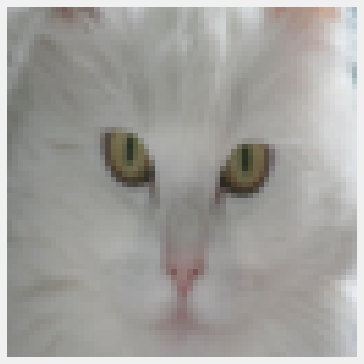

In [321]:
# Import training dataset
train_dataset = h5py.File("/content/train_catvnoncat.h5")
X_train = np.array(train_dataset["train_set_x"])
y_train = np.array(train_dataset["train_set_y"])

test_dataset = h5py.File("/content/test_catvnoncat.h5")
X_test = np.array(test_dataset["test_set_x"])
y_test = np.array(test_dataset["test_set_y"])

# print the shape of input data and label vector
print(f"""Original dimensions:\n{20 * '-'}\nTraining: {X_train.shape}, {y_train.shape}
Test: {X_test.shape}, {y_test.shape}""")

# plot cat image
plt.figure(figsize=(6, 6))
plt.imshow(X_train[50])
plt.axis("off");

# Transform input data and label vector
X_train = X_train.reshape(209, -1).T
y_train = y_train.reshape(-1, 209)

X_test = X_test.reshape(50, -1).T
y_test = y_test.reshape(-1, 50)

# standarize the data
X_train = X_train / 255
X_test = X_test / 255

print(f"""\nNew dimensions:\n{15 * '-'}\nTraining: {X_train.shape}, {y_train.shape}
Test: {X_test.shape}, {y_test.shape}""")

In [322]:
# Define the multi-layer model using all the helper functions we wrote before


def L_layer_model(
        X, y, layers_dims, learning_rate=0.01, num_iterations=3000,
        print_cost=True, hidden_layers_activation_fn="relu"):
    """
    Implements multilayer neural network using gradient descent as the
    learning algorithm.

    Arguments
    ---------
    X : 2d-array
        data, shape: number of examples x num_px * num_px * 3.
    y : 2d-array
        true "label" vector, shape: 1 x number of examples.
    layers_dims : list
        input size and size of each layer, length: number of layers + 1.
    learning_rate : float
        learning rate of the gradient descent update rule.
    num_iterations : int
        number of iterations of the optimization loop.
    print_cost : bool
        if True, it prints the cost every 100 steps.
    hidden_layers_activation_fn : str
        activation function to be used on hidden layers: "tanh", "relu".

    Returns
    -------
    parameters : dict
        parameters learnt by the model. They can then be used to predict test examples.
    """
    np.random.seed(1)

    # initialize parameters
    parameters = initialize_parameters(layers_dims)

    # intialize cost list
    cost_list = []

    # iterate over num_iterations
    for i in range(num_iterations):
        # iterate over L-layers to get the final output and the cache
        AL, caches = L_model_forward(
            X, parameters, hidden_layers_activation_fn)

        # compute cost to plot it
        cost = compute_cost(AL, y)

        # iterate over L-layers backward to get gradients
        grads = L_model_backward(AL, y, caches, hidden_layers_activation_fn)

        # update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # append each 100th cost to the cost list
        if (i + 1) % 100 == 0 and print_cost:
            print(f"The cost after {i + 1} iterations is: {cost:.4f}")

        if i % 100 == 0:
            cost_list.append(cost)

    # plot the cost curve
    plt.figure(figsize=(10, 6))
    plt.plot(cost_list)
    plt.xlabel("Iterations (per hundreds)")
    plt.ylabel("Loss")
    plt.title(f"Loss curve for the learning rate = {learning_rate}")

    return parameters


def accuracy(X, parameters, y, activation_fn="relu"):
    """
    Computes the average accuracy rate.

    Arguments
    ---------
    X : 2d-array
        data, shape: number of examples x num_px * num_px * 3.
    parameters : dict
        learnt parameters.
    y : 2d-array
        true "label" vector, shape: 1 x number of examples.
    activation_fn : str
        activation function to be used on hidden layers: "tanh", "relu".

    Returns
    -------
    accuracy : float
        accuracy rate after applying parameters on the input data
    """
    probs, caches = L_model_forward(X, parameters, activation_fn)
    labels = (probs >= 0.5) * 1
    accuracy = np.mean(labels == y) * 100

    return f"The accuracy rate is: {accuracy:.2f}%."

The cost after 100 iterations is: 0.6556
The cost after 200 iterations is: 0.6468
The cost after 300 iterations is: 0.6447
The cost after 400 iterations is: 0.6441
The cost after 500 iterations is: 0.6440
The cost after 600 iterations is: 0.6440
The cost after 700 iterations is: 0.6440
The cost after 800 iterations is: 0.6439
The cost after 900 iterations is: 0.6439
The cost after 1000 iterations is: 0.6439
The cost after 1100 iterations is: 0.6439
The cost after 1200 iterations is: 0.6439
The cost after 1300 iterations is: 0.6438
The cost after 1400 iterations is: 0.6438
The cost after 1500 iterations is: 0.6437
The cost after 1600 iterations is: 0.6434
The cost after 1700 iterations is: 0.6429
The cost after 1800 iterations is: 0.6413
The cost after 1900 iterations is: 0.6361
The cost after 2000 iterations is: 0.6124
The cost after 2100 iterations is: 0.5112
The cost after 2200 iterations is: 0.5347
The cost after 2300 iterations is: 0.4830
The cost after 2400 iterations is: 0.5311
T

'The accuracy rate is: 64.00%.'

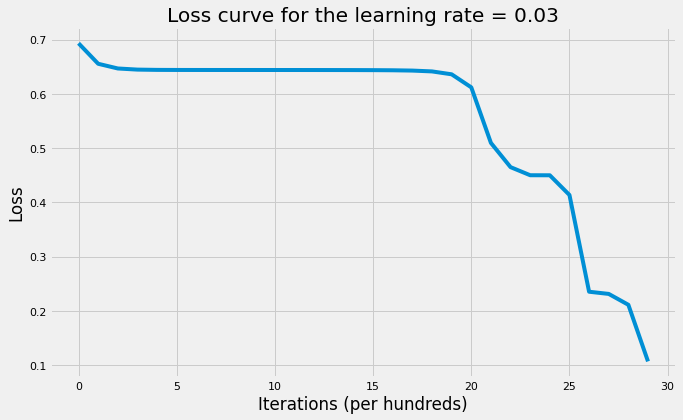

In [323]:
# Setting layers dims
layers_dims = [X_train.shape[0], 5, 5, 1]

# NN with tanh activation fn
parameters_tanh = L_layer_model(
    X_train, y_train, layers_dims, learning_rate=0.03, num_iterations=3000,
    hidden_layers_activation_fn="tanh")

# Print the accuracy
accuracy(X_test, parameters_tanh, y_test, activation_fn="tanh")

The cost after 100 iterations is: 0.6556
The cost after 200 iterations is: 0.6468
The cost after 300 iterations is: 0.6447
The cost after 400 iterations is: 0.6441
The cost after 500 iterations is: 0.6440
The cost after 600 iterations is: 0.6440
The cost after 700 iterations is: 0.6440
The cost after 800 iterations is: 0.6440
The cost after 900 iterations is: 0.6440
The cost after 1000 iterations is: 0.6440
The cost after 1100 iterations is: 0.6439
The cost after 1200 iterations is: 0.6439
The cost after 1300 iterations is: 0.6439
The cost after 1400 iterations is: 0.6439
The cost after 1500 iterations is: 0.6439
The cost after 1600 iterations is: 0.6439
The cost after 1700 iterations is: 0.6438
The cost after 1800 iterations is: 0.6437
The cost after 1900 iterations is: 0.6435
The cost after 2000 iterations is: 0.6432
The cost after 2100 iterations is: 0.6423
The cost after 2200 iterations is: 0.6395
The cost after 2300 iterations is: 0.6259
The cost after 2400 iterations is: 0.5408
T

'The accuracy rate is: 42.00%.'

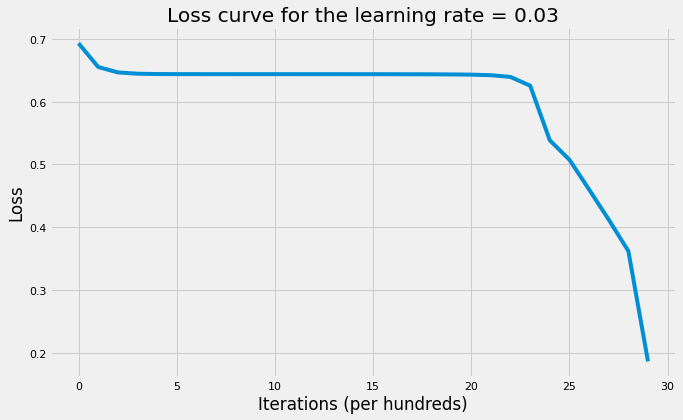

In [324]:
# NN with relu activation fn
parameters_relu = L_layer_model(
    X_train, y_train, layers_dims, learning_rate=0.03, num_iterations=3000,
    hidden_layers_activation_fn="relu")

# Print the accuracy
accuracy(X_test, parameters_relu, y_test, activation_fn="relu")

# LSTM (Long Short Term Memory)

## Recurrent Neural Networks (RNN)

Consider sequential data, which may be found in the stock market for a certain stock. A basic machine learning model or an Artificial Neural Network may learn to anticipate stock prices based on a variety of factors such as the stock's volume, opening value, and so on. While these characteristics influence the stock's price, it is also influenced by the stock's prior day's value. In reality, for a trader, the previous days' values (or the trend) are a crucial determining element in making forecasts.
All test cases are considered independent in traditional feed-forward neural networks. That is, while training the model for a certain day, the stock prices from the prior days are ignored.

Recurrent Neural Networks are used to accomplish this temporal dependence. The following is an example of an RNN:
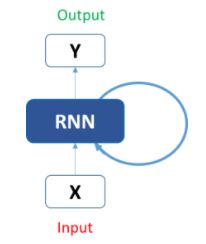

This may be intimidating at first sight, but once unfolded, it looks a lot simpler:
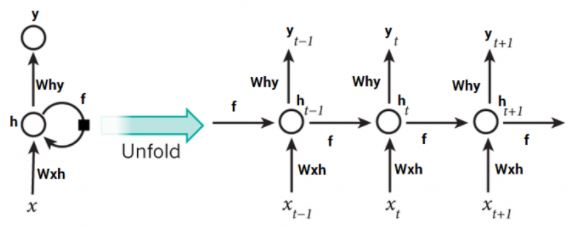

It is now easy for us to see how these networks examine the trend of stock prices before projecting today's stock values. Every forecast at time t (h t) is based on all prior predictions and the data gathered from them.

RNNs can help us with sequence management to a degree, but not completely. Our goal is for our computers to be capable of writing Shakespearean sonnets. RNNs are wonderful for brief contexts, but we need our models to be able to grasp and recall the context behind the sequences, just like a human brain, in order to form a storey and remember it. With a basic RNN, this is not achievable.

## Limitations of RNNs

When dealing with short-term dependencies, recurrent neural networks are ideal. RNNs have shown to be quite successful. This is because the issue has nothing to do with the statement's context. The RNN doesn't have to recall what was stated before this or what it meant; all they need to know is that the sky is usually blue. Vanilla RNNs, on the other hand, are unable to comprehend the context of an input. When making forecasts in the present, it is impossible to remember what was said in the past.
We may deduce from this that, having worked in Spain for 20 years, the author is likely to have a decent grasp of the language. However, in order to produce an accurate forecast, the RNN must remember the context. A large amount of unnecessary data may distance the relevant information from the point when it is required. A Recurrent Neural Network fails in this situation!
The cause for this is the Vanishing Gradient issue. You'll need some understanding of how a feed-forward neural network learns in order to grasp this. We know that the weight update done on a specific layer in a standard feed-forward neural network is a multiple of the learning rate, the error term from the previous layer, and the input to that layer. As a result, the error term for a given layer is simply a product of the mistakes of all prior levels. When working with activation functions like the sigmoid, the tiny values of its derivatives (found in the error function) are multiplied numerous times as we go closer to the initial layers. As a result, the gradient practically vanishes as a result of this.
Recurrent Neural Networks show a similar pattern. RNN only remembers things for short periods of time, thus if we require the knowledge in a short period of time, it may be reproduced, but once a large number of words are put in, it is lost. A slightly adjusted variant of RNNs — the Long Short-Term Memory Networks – can be used to tackle this problem.

# Architecture of LSTMs

Understanding how LSTM works may be illustrated by looking at how a news team covering a murder storey works. A news narrative is now constructed on facts, proof, and many people's statements. When a new event happens, you can choose from one of the three options.

Let's imagine we assumed the murder was carried out by 'poisoning' the victim, but the autopsy report just arrived that said the cause of death was 'an impact on the head.' What do you do as a member of this journalism team? You quickly forget the prior cause of death and all the tales that surrounded it.

What happens if a whole new suspect enters the picture? Someone with a vendetta towards the victim who may be the murderer? Isn't it true that you placed this material into your news feed?

All of these shattered bits of knowledge can no longer be fed by conventional media. So, once a specific amount of time has passed, you must condense this data and present the pertinent facts to your audience. "XYZ turns out to be the major suspect," for example.

Now let’s get into the details of the architecture of LSTM network:

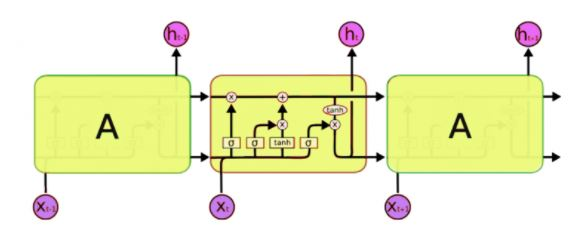

This isn't anything near to the basic version we saw before, but bear with me while I guide you through it. A typical LSTM network is made up of several memory blocks known as cells (the rectangles that we see in the image). The cell state and the concealed state are the two states that are passed to the following cell. The memory blocks are in charge of remembering things, and they are manipulated by three basic mechanisms known as gates. Each of these is detailed further down.

# Forget Gate

Consider the case of a text prediction issue. Assume the following statement is input into an LSTM: The forget gate recognises that there may be a change of context in the next line as soon as the first full stop after "person" is reached. As a result, the sentence's subject is forgotten, and the subject's position is deserted. And when we start talking about "Dan," this subject's place is assigned to "Dan." The forget gate is responsible for this process of forgetting the subject.

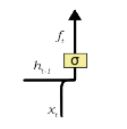
A forget gate is in charge of erasing data from the cell state. By multiplying a filter, information that is no longer necessary for the LSTM to comprehend things or that is of lesser value is eliminated. This is essential for the LSTM network's performance to be optimised.

h t-1 and x t are the two inputs to this gate.

x t is the input at that time step, and h t-1 is the hidden state from the previous cell or the output of the previous cell. The weight matrices are multiplied by the provided inputs, and a bias is applied. This value is then subjected to the sigmoid function. The sigmoid function returns a vector with values ranging from 0 to 1, one for each cell state number. The sigmoid function is in charge of determining which data should be kept and which should be discarded. When the forget gate outputs a '0' for a specific value in the cell state, it signifies that the forget gate wants the cell state to fully forget that piece of information. Similarly, a '1' indicates that the forget gate is active.

# Input Gate

Let's look at another statement that the LSTM is analysing: The essential information here is that "Bob" knows how to swim and has served in the Navy for four years. This can be added to the cell state, but the fact that he did it over the phone is a minor detail that may be overlooked. The input gate can be used to bring fresh information to the system.

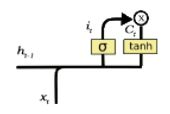

The input gate is in charge of adding information to the current state of the cell. As seen in the picture above, this information addition is a three-step procedure.

A sigmoid function is used to control what values should be added to the cell state. This is similar to the forget gate in that it functions as a filter for all of the data from h t-1 and x t.
Creating a vector containing all potential values that can be added to the cell state (as determined by h t-1 and x t). The tanh function, which returns values ranging from -1 to +1, is used to do this.
Adding this important information to the produced vector (the tanh function) by multiplying the value of the regulatory filter (the sigmoid gate) to it.

# Output Gate

Not all information associated with a cell's state is suitable for output at a specific time. There might be several choices for the empty space in this statement. However, we already know that the present input, 'brave,' is an adjective that describes a noun. As a result, whatever word comes next has a good likelihood of being a noun. As a result, Bob might be an appropriate output.


The output gate is responsible for picking valuable information from the current cell state and displaying it as an output. Here's how it works:

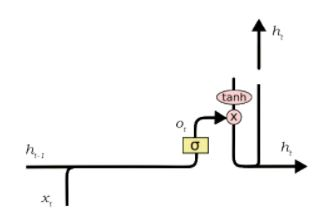

An output gate's operation may be broken down into three parts once more:

After applying the tanh function on the cell state, the values are scaled to the range -1 to +1, resulting in a vector.
Using the values of h t-1 and x t, design a filter that can control the values that must be produced from the vector established previously. A sigmoid function is used once again in this filter.
Multiplying the value of this regulatory filter by the vector formed in step 1 and sending it out as an output as well as to the following cell's concealed state.
The filter in the above example will ensure that all other values except 'Bob' are diminished. As a result, the filter must be constructed from the input and concealed state values before being applied to the cell state vector.

In [325]:
# Importing dependencies numpy and keras
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

In [326]:
# load text
filename = "/content/data.txt"

text = (open(filename).read()).lower()

# mapping characters with integers
unique_chars = sorted(list(set(text)))

char_to_int = {}
int_to_char = {}

for i, c in enumerate (unique_chars):
    char_to_int.update({c: i})
    int_to_char.update({i: c})

In [327]:
# preparing input and output dataset
X = []
Y = []

for i in range(0, len(text) - 50, 1):
    sequence = text[i:i + 50]
    label =text[i + 50]
    X.append([char_to_int[char] for char in sequence])
    Y.append(char_to_int[label])

In [328]:
# reshaping, normalizing and one hot encoding
X_modified = numpy.reshape(X, (len(X), 50, 1))
X_modified = X_modified / float(len(unique_chars))
Y_modified = np_utils.to_categorical(Y)

In [329]:
# defining the LSTM model
model = Sequential()
model.add(LSTM(300, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [330]:
# fitting the model
model.fit(X_modified, Y_modified, epochs=1, batch_size=30)

# picking a random seed
start_index = numpy.random.randint(0, len(X)-1)
new_string = X[start_index]

# generating characters
for i in range(50):
    x = numpy.reshape(new_string, (1, len(new_string), 1))
    x = x / float(len(unique_chars))

    #predicting
    pred_index = numpy.argmax(model.predict(x, verbose=0))
    char_out = int_to_char[pred_index]
    seq_in = [int_to_char[value] for value in new_string]
    print(char_out)

    new_string.append(pred_index)
    new_string = new_string[1:len(new_string)]

3343/3343 [==============================] - 1351s 403ms/step - loss: 2.7507
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t
h
e
 
t


After enough training epochs, it will eventually provide better and better outcomes. This is how we should tackle a sequence prediction challenge with LSTM.